# Random forests

This is an assignment for week 2 of the 'Machine Learning for Data Analysis' course by Wesleyan University.

The task at hand is to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable. In this assignment, I will assess the importance of several macroeconomic indicators in predicting whether a country is a member of WTO or not.

The dataset was prepared earlier and contains information about 217 countries for 2017: GDP, imports, exports, population, ease of doing business, whether a country is landlocked and WTO status. 

## Prepare the dataset 

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
# Download prepared csv file
data = pd.read_csv('openness_df.csv')

In [12]:
data.sample(5)

,country,year,gdp,gdp_ppc,imports,exports,population,business_ease,code,region,tariff,wto_status,landlocked,remoteness,openness
129,Mali,2017,1.533774e+10,828.511976,5.495670e+09,3.404945e+09,18512394.0,52.87624,MLI,Sub-Saharan Africa,9.807805,Member,1,2.062692e+10,0.580308
49,Czech Republic,2017,2.159135e+11,20379.896040,1.558956e+11,1.721394e+11,10594438.0,76.42162,CZE,Europe & Central Asia,NaN,Member,1,5.822390e+11,1.519289
29,Bhutan,2017,2.450365e+09,3286.574704,1.291995e+09,7.371479e+08,745568.0,65.76640,BTN,South Asia,23.735849,Observer,1,1.602754e+09,0.828098
107,Lao PDR,2017,1.685309e+10,2423.846203,NaN,NaN,6953035.0,49.98578,LAO,East Asia & Pacific,7.674604,Member,1,1.087749e+10,NaN
183,Sweden,2017,5.405452e+11,53744.429032,2.228414e+11,2.401832e+11,10057698.0,82.17491,SWE,Europe & Central Asia,NaN,Member,0,1.031199e+12,0.856588


In [27]:
# Clean the dataset
data = data[['wto_status','gdp_ppc','population','tariff','remoteness','openness','business_ease','landlocked']]
data = data[data['remoteness'] > 0]
data.dropna(inplace=True)

In [28]:
# Bin WTO status into two categories
data["wto_status"] = data["wto_status"].replace({'Member': 1, 'Observer': 0, 'No perticipation': 0})

## Growing Rundom Forest

In [29]:
predictors = data[['gdp_ppc','population','tariff','remoteness','openness','business_ease','landlocked']]

targets = data.wto_status

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(76, 7)
(52, 7)
(76,)
(52,)


In [30]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print(sklearn.metrics.accuracy_score(tar_test, predictions))

[[ 0  5]
 [ 1 46]]
0.8846153846153846


In [34]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

# display the relative importance of each attribute
for feature, column in zip(model.feature_importances_,predictors.columns):
    print(column, feature)

gdp_ppc 0.10258574979684003
population 0.16317734223536845
tariff 0.29358956634008465
remoteness 0.1618216148249735
openness 0.14175495973131072
business_ease 0.09774201684091414
landlocked 0.03932875023050845


/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


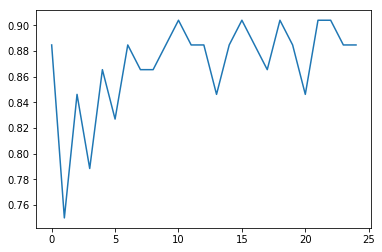

In [32]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)

In [36]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=11)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print(sklearn.metrics.accuracy_score(tar_test, predictions))

[[ 0  5]
 [ 0 47]]
0.9038461538461539


In [37]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

# display the relative importance of each attribute
for feature, column in zip(model.feature_importances_,predictors.columns):
    print(column, feature)

gdp_ppc 0.18799348857764814
population 0.12378228463131058
tariff 0.28717379719510744
remoteness 0.14453115596930524
openness 0.11568196058836386
business_ease 0.10586414968215496
landlocked 0.03497316335610979


/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

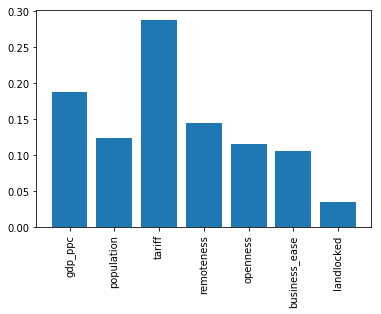

In [39]:
plt.bar(predictors.columns,model.feature_importances_)
plt.xticks(rotation='vertical')

## Conclusion

The model predicted WTO membership of a country accurately in 88% of the cases with 0 true positive values, 46 true negatives, five false positives, and one false negative.  However, the visualization shows that we would have a better score with 11 trees instead of 25. With 11 trees our model accuracy is 90, this model produced no false negatives and 47 true negatives.

According to the importance scores, the most important variable in predicting WTO membership is the average applied tariff with a score of 0.29. It is followed by country income level measured in GPD per capita with a score of 0.19 and economical remoteness of the country with a score of 0.14. The least important indicator in the model is whether a country is landlocked or not.